# Homework 1

## References

+ Lectures 1-3 (inclusive).

## Instructions

+ Type your name and email in the "Student details" section below.
+ Develop the code and generate the figures you need to solve the problems using this notebook.
+ For the answers that require a mathematical proof or derivation you should type them using latex. If you have never written latex before and you find it exceedingly difficult, we will likely accept handwritten solutions.
+ The total homework points are 100. Please note that the problems are not weighed equally.

In [9]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(rc={"figure.dpi":100, "savefig.dpi":300})
sns.set_context("notebook")
sns.set_style("ticks")

## Student details

+ **First Name: Ben**
+ **Last Name: McAteer**
+ **Email: bmcateer@purdue.edu**

## Problem 1

Disclaimer: This example is a modified version of the one found in a 2013 lecture on Bayesian Scientific Computing taught by Prof. Nicholas Zabaras.
I am not sure where the original problem is coming from.

We are tasked with assessing the usefulness of a tuberculosis test.
The prior information I is:

> The percentage of the population infected by tuberculosis is 0.4\%.
We have run several experiments and determined that:
+ If a tested patient has the disease, then 80\% of the time the test comes out positive.
+ If a tested patient does not have the disease, then 90\% of the time the test comes out negative.

To facilitate your analysis, consider the following logical sentences concerning a patient:

> A: The patient is tested and the test is positive.

> B: The patient has tuberculosis.

A. Find the probability that the patient has tuberculosis (before looking at the result of the test), i.e., $p(B|I)$. This is known as the base rate or the prior probability.<br>
**Answer:** 
$ P(B|I) = 0.4$% (given information)
<br><br><br><br><br><br><br><br>

In [10]:
#1a
import math
import numpy as np

infected = 0.004 # % of pop infected with TB
truepos = 0.80 # % of positives that test positive
trueneg = 0.90 # % of negatives that test negative

B. Find the probability that the test is positive given that the patient has tuberculosis, i.e., $p(A|B,I)$.<br>
**Answer:** 
$ P(A|B,I) = 80$% (given information)
<br><br><br><br><br><br><br><br>

C. Find the probability that the test is positive given that the patient does not have tuberculosis, i.e., $p(A|\neg B, I)$.<br>
**Answer:**
$p(A|\neg B, I) = 1 - p(A|B, I)
= 1 - 0.90 = 0.10$
<br><br><br><br><br><br><br><br>

In [11]:
#1c
falsepos = 1 - trueneg #false positive test
print('false positive probability is {0:1.2f} '.format(falsepos))

false positive probability is 0.10 


D. Find the probability that a patient that tested positive has tuberculosis, i.e., $p(B|A,I)$.<br>
**Answer:** $p(B|A,I) = \dfrac{p(A|B,I) * p(B)}{P(A)}$ = 0.03113
<br><br><br><br><br><br><br><br>


In [12]:
#1d
actualpos = infected*truepos / (((1-infected)*falsepos)+ infected*truepos) #% of population that is actually positive after a positive test
print('The probability that a patient that tested positive has tuberculosis is {0:1.5f} '.format(actualpos))

The probability that a patient that tested positive has tuberculosis is 0.03113 


E. Find the probability that a patient that tested negative has tuberculosis, i.e., $p(B|\neg A, I)$. Does the test change our prior state of knowledge about about the patient? Is the test useful?<br>
**Answer:** $p(B|\neg A, I) = \dfrac{1 - p(B|A, I)}{1 - p(B|A, I) + (1- p(A))} $ 
<br><br><br><br><br><br><br><br>

In [13]:
#1e
falseneg = 1 - truepos
actualfalseneg = infected*falseneg / (infected*falseneg + (1-infected)*trueneg) #% of population that is positive but tested negative
print('The probability that a patient that tested negative has tuberculosis is {0:1.5f} '.format(actualfalseneg))

The probability that a patient that tested negative has tuberculosis is 0.00089 


F. What would a good test look like? Find values for 

$$
p(A|B,I)= p(\text{test is positive} |\text{has tuberculosis},I),
$$

and

$$
p(A| \neg B, I) = p(\text{test is positive}|\text{does not have tuberculosis}, I),
$$

so that

$$
p(B|A, I) = p(\text{has tuberculosis}|\text{test is positive}, I) = 0.99.
$$

There are more than one solutions. How would you pick a good one? Thinking in this way can help you set goals if you work in R\&D. If you have time, try to figure out whether or not there exists such an accurate test for tuberculosis<br>
**Answer:** 
Given the low percent of the population actually infected with tuberculosis, the rate of false positives is by far the most important statistic to work with. The test needs to be highly specific and not allow many false positives. This likely means that it will be less sensitive (more false negatives). I found a working test to be 99.6% probable that the patient has tuberculosis given that the test is positive if the probability of the test being positive given the patient having tuberculosis is 70% but the probability of the test being positive while the patient not having tuberculosis (false positive) is 0.00099% probable.

$
p(B|A,I) = \dfrac{p(A|B, I)}{p(A|B, I) + (1-p(A))} 
$
<br><br><br><br><br><br><br><br>

In [14]:
#1f
Gtruepos = 0.7
Gtrueneg = 0.99999
Gfalsepos = 1-Gtrueneg
goodtest = infected*Gtruepos / (infected*Gtruepos + (1-infected)*Gfalsepos)
print('A "good test" with the patient having tuberculosis given a positive test in aprobability of {0:1.5f} '.format(goodtest))
print('Would need a probability of a true positive (patient having TB given a positive test) of {0:1.5f}'.format(Gtruepos), 'yet a probability of a false positive of {0:1.5f}'.format(Gfalsepos))

A "good test" with the patient having tuberculosis given a positive test in aprobability of 0.99646 
Would need a probability of a true positive (patient having TB given a positive test) of 0.70000 yet a probability of a false positive of 0.00001


## Problem 2 - Practice with discrete random variables

Consider the Categorical random variable:

$$
X \sim \operatorname{Categorical}(0.3, 0.1, 0.2, 0.4),
$$

taking values in $\{0,1,2,3\}$. Find the following (you may use ``scipy.stats.rv_discrete`` or do it by hand):

A. The expectation $\mathbb{E}[X]$.

**Answer:** in code below
<br><br>

In [15]:
import scipy
from scipy import stats

probs = [0.3,0.1,0.2,0.4] #probabilities of X
X = ([0,1,2,3]) #values of X

dataset = stats.rv_discrete(name='dataset', values =(X,probs))

#datasetval = sub_
expect = stats.rv_discrete.expect(dataset)
print('The expectation is {0:1.2f}'.format(expect))


The expectation is 1.70


B. The variance $\mathbb{V}[X]$.

**Answer:** in code below
<br><br>

In [16]:
#2b
var = stats.rv_discrete.var(dataset)
#stats.rv_discrete.
print('The variance is {0:1.2f}'.format(var))

The variance is 1.61


C. Plot the probability mass function of $X$.

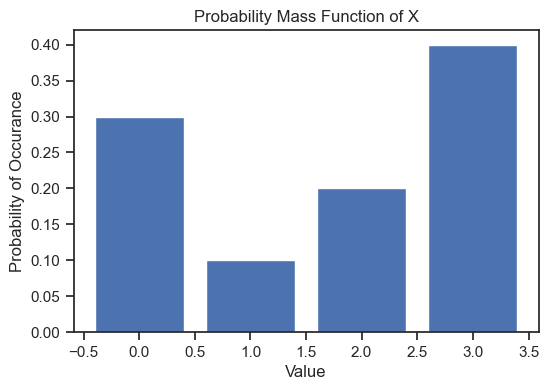

In [17]:
#2c
import matplotlib.pyplot as plt

plt.figure()
plt.bar(X, dataset.pmf(X))
plt.xlabel("Value")
plt.ylabel("Probability of Occurance")
plt.title("Probability Mass Function of X")
plt.show()

D. Find the probability that $X$ is in $\{0, 2\}$.

**Answer:** in code below
<br><br>

In [18]:
#2d
Probselected = 0.3 + 0.2 #probability that the selected X is either 0 or 2
print('The probability that either a 0 or 2 is selected is {0:1.2f}'.format(Probselected))

The probability that either a 0 or 2 is selected is 0.50


E. Find $\mathbb{E}[4X + 3]$.

**Answer:** in code below
<br><br>

In [19]:
#2e
newexpect = stats.rv_discrete.expect(dataset)*4+3
print('The expected value is {0:1.2f}'.format(newexpect))

The expected value is 9.80


F. Find $\mathbb{V}[4X+3]$.

**Answer:** in code below
<br><br>

In [20]:
newvar = stats.rv_discrete.var(dataset)*4+3
print('The variance value is {0:1.2f}'.format(newvar))

The variance value is 9.44


## Problem 3 - Predicting the probability of major earthquakes in Southern California

The [San Andreas fault](https://en.wikipedia.org/wiki/San_Andreas_Fault) extends through California forming the boundary between the Pacific and the North American tectonic plates.
It has caused some of the major earthquakes on Earth.
We are going to focus on Southern California and we would like to assess the probability of a major earthquake, defined as an earthquake of magnitude 6.5 or greater, during the next ten years.

A. The first thing we are going to do is go over a [database of past earthquakes](https://scedc.caltech.edu/significant/chron-index.html) that have occured in Southern California and collect the relevant data. We are going to start at 1900 because data before that time may are unreliable.
Go over each decade and count the occurence of a major earthquake (i.e., count the number of organge and red colors in each decade). We have done this for you.

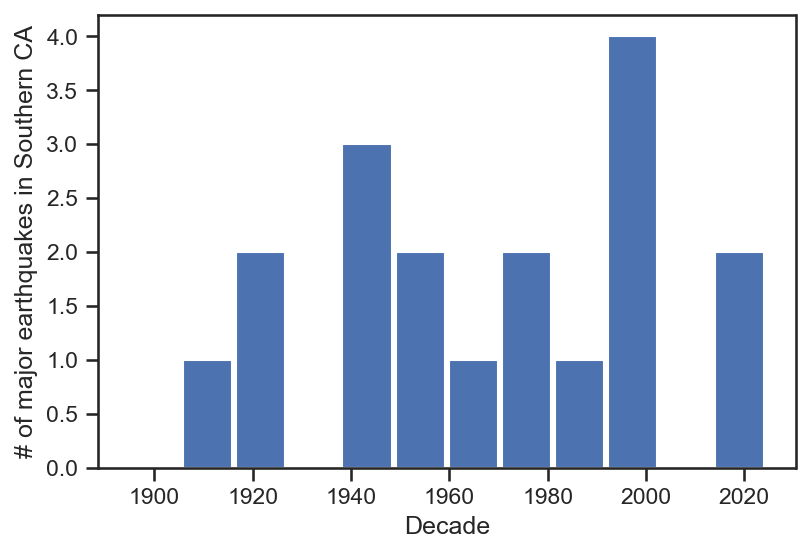

In [21]:
eq_data = np.array([
    0, # 1900-1909
    1, # 1910-1919
    2, # 1920-1929
    0, # 1930-1939
    3, # 1940-1949
    2, # 1950-1959
    1, # 1960-1969
    2, # 1970-1979
    1, # 1980-1989
    4, # 1990-1999
    0, # 2000-2009
    2 # 2010-2019 
])
fig, ax = plt.subplots(dpi=150)
ax.bar(np.linspace(1900, 2019, eq_data.shape[0]), eq_data, width=10)
ax.set_xlabel('Decade')
ax.set_ylabel('# of major earthquakes in Southern CA');


B. The [Poisson distribution](https://en.wikipedia.org/wiki/Poisson_distribution) is a discrete distribution with values $\{0,1,2,\dots\}$ which is commonly used to model the number of events occuring in a certain time period.
It is the right choice when these events are happening independently and the probability of any event happening over a small period of time is constant.
Let's use the Poisson to model the number of earthquakes $X$ occuring in a decade.
We write:

$$
X \sim \operatorname{Poisson}(r),
$$

where $r$ is the *rate parameter* of Poisson.
The rate is the number of events per time period.
Here, $r$ is the number of earthquakes per decade.
Using the data above, we can set the rate as the empirical average of the observed number of earthquakes per decade:

In [22]:
r = np.mean(eq_data)
print('r = {0:1.2f} major earthquakes per decade'.format(r))

r = 1.50 major earthquakes per decade


Strictly speaking, **this is not how you should be calibrating models!!!**
We will learn about the **right** way (which uses Bayes' rule) in the subsequent lectures.
But it will do for now as the answer you would get using the **right** way is, for this problem, almost the same.
Let's define a Poisson distribution using ``scipy.stats.poisson`` (see documentation [here](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.poisson.html)):

In [23]:
X = scipy.stats.poisson(r)

A. Plot the probability mass function of ``X``.

Text(0.5, 1.0, '3A: Probabilty Mass Function of Earthquake Occurance')

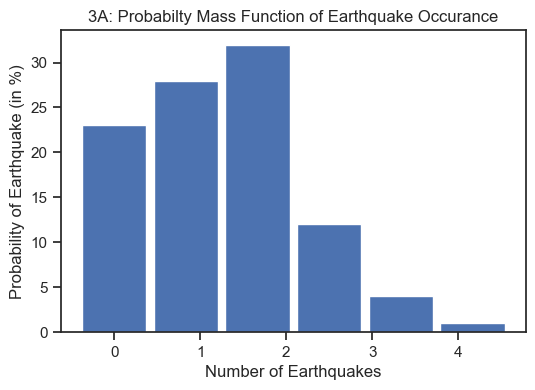

In [24]:
R = X.rvs(size = 100)
uniquevals = len(set(R))
   
plt.figure()
plt.hist(R,align = 'left', bins = uniquevals, rwidth = 0.9)
plt.ylabel('Probability of Earthquake (in %)')
plt.xlabel('Number of Earthquakes')
plt.title('3A: Probabilty Mass Function of Earthquake Occurance')

B. What is the probability that at least one major earthquake will occur during the next decade?<br>
**Answer:** in code below
<br><br><br><br><br><br><br><br>

In [25]:
#3B
#prob that earthquake will be >= 1

prob_occur = 1 - (r**0 * np.exp(-r)) / 1 #using obvious rule, we can simply find 1- probability of finding zero earthquakes in a decade 
print('The probability that at least one earthquake will occur in the next decade is {0:1.4f}'.format(prob_occur))

The probability that at least one earthquake will occur in the next decade is 0.7769


C. What is the probability that at least one major earthquake will occur during the next two decades?
Hint: Consider two independent and identical copies of $X$, say $X_1$ and $X_2$.
And consider their sum $Y = X_1 + X_2$. Read [this](https://en.wikipedia.org/wiki/Poisson_distribution#Sums_of_Poisson-distributed_random_variables) about the sum of two independent Poisson distributions.
<br>
**Answer:** in code below
<br><br><br><br><br><br><br><br>

In [26]:
#3C 
doubleavg = r*2 #avg earthquakes will double given double the time
prob_occur2decades = 1 - (doubleavg**0 * np.exp(-doubleavg)) / 1
print('The probability that at least one earthquake will occur in the next two decades is {0:1.4f}'.format(prob_occur2decades))

The probability that at least one earthquake will occur in the next two decades is 0.9502


D. What is the probability that at least one major earthquake will occur during the next five decades?<br>
**Answer:** in code below
<br><br><br><br><br><br><br><br>

In [27]:
#3D
fiveavg = r*5
prob_occur5decades = 1 - (fiveavg**0 * np.exp(-fiveavg)) / 1
print('The probability that at least one earthquake will occur in the next 5 decades is {0:1.4f}'.format(prob_occur5decades))

The probability that at least one earthquake will occur in the next 5 decades is 0.9994
